In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import spotipy 
import librosa
import librosa.display
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
import os.path
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials

# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido
import librosa
import librosa.display
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 

# Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from sklearn.preprocessing import quantile_transform

# Styles
sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [33]:
#df_merged_all = pd.read_pickle('../sources/df_merged_all_quantiles_mediana_iqr.pickle')
df_merged_all = pd.read_pickle('../sources/df_todo_1_Uniform.pickle')
len(df_merged_all)
#df_num = df_merged_all
#df_merged_all.head(3).T.tail(20)

4082

In [34]:
list(df_merged_all.columns)

['af_duration_ms',
 'af_popularity',
 'af_danceability',
 'af_energy',
 'af_key',
 'af_loudness',
 'af_mode',
 'af_speechiness',
 'af_acousticness',
 'af_instrumentalness',
 'af_liveness',
 'af_valence',
 'af_tempo',
 'af_time_signature',
 'aa_confidence_mediana',
 'aa_loudness_start_mediana',
 'aa_loudness_max_time_mediana',
 'aa_loudness_max_mediana',
 'aa_loudness_end_mediana',
 'aa_p00_C_mediana',
 'aa_p01_C#_mediana',
 'aa_p02_D_mediana',
 'aa_p03_D#_mediana',
 'aa_p04_E_mediana',
 'aa_p05_F_mediana',
 'aa_p06_F#_mediana',
 'aa_p07_G_mediana',
 'aa_p08_G#_mediana',
 'aa_p09_A_mediana',
 'aa_p10_A#_mediana',
 'aa_p11_B_mediana',
 'aa_t00_mediana',
 'aa_t01_mediana',
 'aa_t02_mediana',
 'aa_t03_mediana',
 'aa_t04_mediana',
 'aa_t05_mediana',
 'aa_t06_mediana',
 'aa_t07_mediana',
 'aa_t08_mediana',
 'aa_t09_mediana',
 'aa_t10_mediana',
 'aa_t11_mediana',
 'aa_confidence_iqr',
 'aa_loudness_start_iqr',
 'aa_loudness_max_time_iqr',
 'aa_loudness_max_iqr',
 'aa_loudness_end_iqr',
 'aa_p

In [35]:
def plot_radar_chart_stats(s25,s50,s75,color,ax):
    grupo=s25.name
    labels = s25.index

    angles=np.linspace(0, 2*np.pi, len(s25), endpoint=False)
    angles=np.append(angles,angles[0])
    s25=np.append(s25,s25[0])
    s50=np.append(s50,s50[0])
    s75=np.append(s75,s75[0])

    ax.plot(angles, s50, 'o-', linewidth=1,color=color,markersize=4)
    ax.set_yticklabels([])
    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=6, color='gray')
    ax.tick_params(pad=-6, direction='out', length=8, color='k', zorder=-1)
    ax.fill_between(angles, s25, s75, alpha=0.2,color=color)
    ax.set_title(grupo, fontsize=12, loc='left')
    ax.grid(True)
    ax.set_ylim(0,1)


In [44]:
df_num=df_merged_all
df_num = df_num.rename(columns={col:col[3:] for col in df_num.columns})
df_num = df_num.rename(columns={'re':'genre'})
grouped = df_num.groupby('genre')

normalized_stats_25_ = grouped.quantile(.25)
normalized_stats_50_ = grouped.quantile(.5)
normalized_stats_75_ = grouped.quantile(.75)
normalized_stats_25_.head(3).T.tail(4)

genre,ambient,classical,death-metal
timbre_dif_mediana,0.273916,0.484126,0.259185
timbre_dif_iqr,0.198437,0.147495,0.039872
timbre_mediana,0.039872,0.167935,0.325230
timbre_iqr,0.254442,0.310509,0.031185


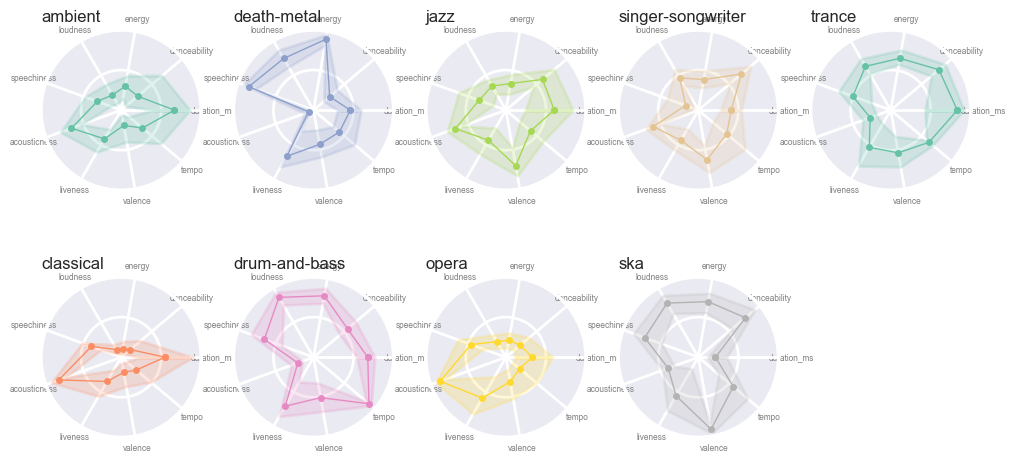

In [45]:
df_num = df_merged_all.drop(['af_instrumentalness','af_mode','af_popularity','af_time_signature','af_key'],1)
cols = [c for c in df_num.columns if c.lower()[:3] == 'af_']
df_num=df_num[cols]
df_num = df_num.rename(columns={col:col[3:] for col in df_num.columns})
cols=df_num.columns

normalized_stats_25=normalized_stats_25_[cols]
normalized_stats_50=normalized_stats_50_[cols]
normalized_stats_75=normalized_stats_75_[cols]

rows=2
my_palette = sns.color_palette("Set2")
q = int(len(normalized_stats_25)/rows)+len(normalized_stats_25)%rows
fig, axs = plt.subplots(rows, q, subplot_kw=dict(polar=True))

for i in range(rows*q):
    if i<len(normalized_stats_25):
        plot_radar_chart_stats(normalized_stats_25.iloc[i],
                               normalized_stats_50.iloc[i],
                               normalized_stats_75.iloc[i],
                               my_palette[i%8],axs[i%rows, int(i/rows)])
    else:
        fig.delaxes(axs[i%rows, int(i/rows)])

plt.savefig('radar_chart_characteristics_audio_features.png',dpi=800, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Gráfico Radar de los features por cada género del set de datos.

La línea gruesa indica la mediana, y el sombreado es el rango intercuartil.

Las características se encuentran escaladas y normalizadas por cuantiles (dando una medición robusta de cada feature para hacer las estadísticas comparables)

Análisis de este gráfico
* La ópera y la clásica son los que más acousticness tienen. Seguidas por la ambient, el jazz y las singer-songwriter.

* Las canciones de trance son las que en general suelen tener mayor duración (seguidas por las ambient, drum-and-bass y jazz).

* Drum-and-bass suele ser el género de mayor liveness junto con death-metal y ska.

* Death-metal es incuestionablemente el género más energético, seguido por drum-and-bass, ska y trance.

* Opera y classical comparten las característica de baja energy, baja valence, bajo tempo, alto acousticness y bajo speechness.

* Los géneros más danceable son singer-songwriter, trance, jazz y ska.


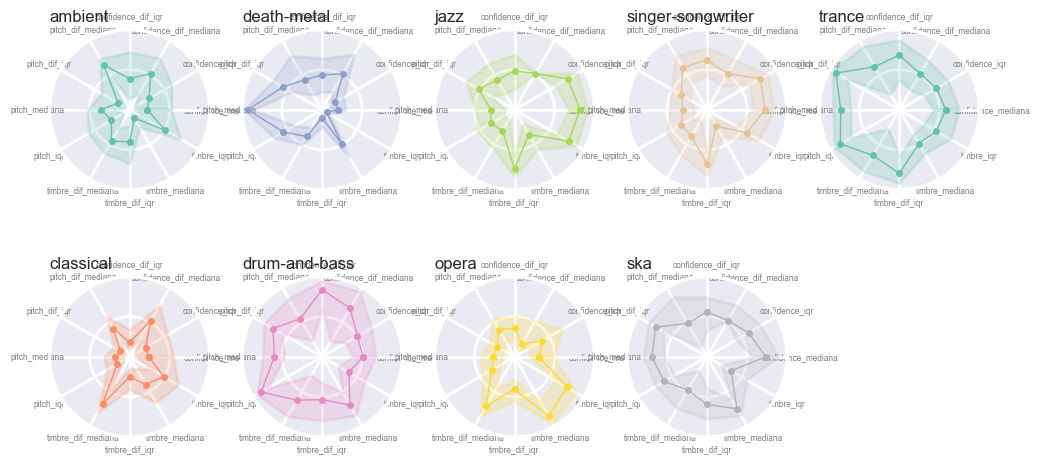

In [53]:
df_num = df_merged_all
cols = [c for c in df_num.columns if 'timbre' in c or 'pitch' in c or 'confidence' in c]
df_num=df_num[cols]
df_num = df_num.rename(columns={col:col[3:] for col in df_num.columns})
cols=df_num.columns


normalized_stats_25=normalized_stats_25_[cols]
normalized_stats_50=normalized_stats_50_[cols]
normalized_stats_75=normalized_stats_75_[cols]

rows=2
my_palette = sns.color_palette("Set2")
q = int(len(normalized_stats_25)/rows)+len(normalized_stats_25)%rows
fig, axs = plt.subplots(rows, q, subplot_kw=dict(polar=True))

for i in range(rows*q):
    if i<len(normalized_stats_25):
        plot_radar_chart_stats(normalized_stats_25.iloc[i],
                               normalized_stats_50.iloc[i],
                               normalized_stats_75.iloc[i],
                               my_palette[i%8],axs[i%rows, int(i/rows)])
    else:
        fig.delaxes(axs[i%rows, int(i/rows)])

plt.savefig('radar_chart_characteristics_timbre_pitch.png',dpi=800, bbox_inches = 'tight', pad_inches = 0)
plt.show()

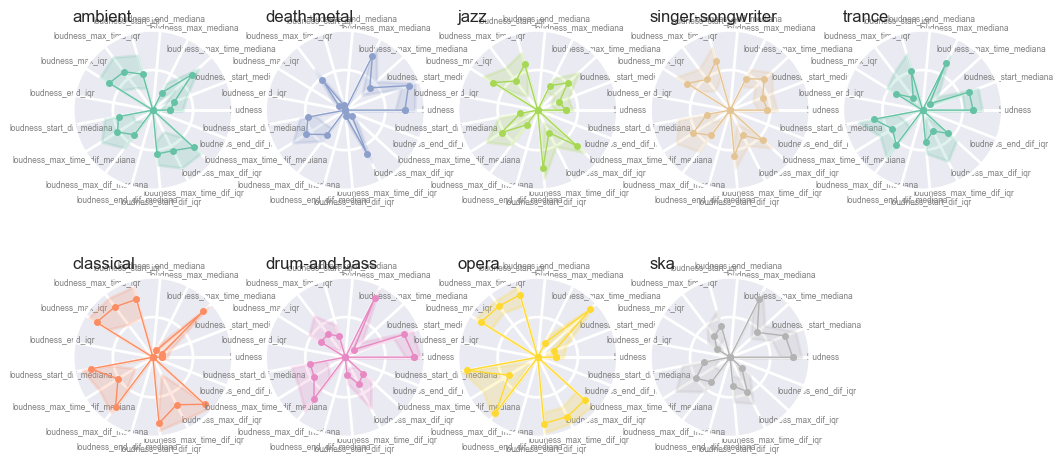

In [54]:
df_num = df_merged_all
cols = [c for c in df_num.columns if 'loudness' in c]
df_num=df_num[cols]
df_num = df_num.rename(columns={col:col[3:] for col in df_num.columns})
cols=df_num.columns


normalized_stats_25=normalized_stats_25_[cols]
normalized_stats_50=normalized_stats_50_[cols]
normalized_stats_75=normalized_stats_75_[cols]

rows=2
my_palette = sns.color_palette("Set2")
q = int(len(normalized_stats_25)/rows)+len(normalized_stats_25)%rows
fig, axs = plt.subplots(rows, q, subplot_kw=dict(polar=True))

for i in range(rows*q):
    if i<len(normalized_stats_25):
        plot_radar_chart_stats(normalized_stats_25.iloc[i],
                               normalized_stats_50.iloc[i],
                               normalized_stats_75.iloc[i],
                               my_palette[i%8],axs[i%rows, int(i/rows)])
    else:
        fig.delaxes(axs[i%rows, int(i/rows)])

plt.savefig('radar_chart_characteristics_loudness.png',dpi=800, bbox_inches = 'tight', pad_inches = 0)
plt.show()